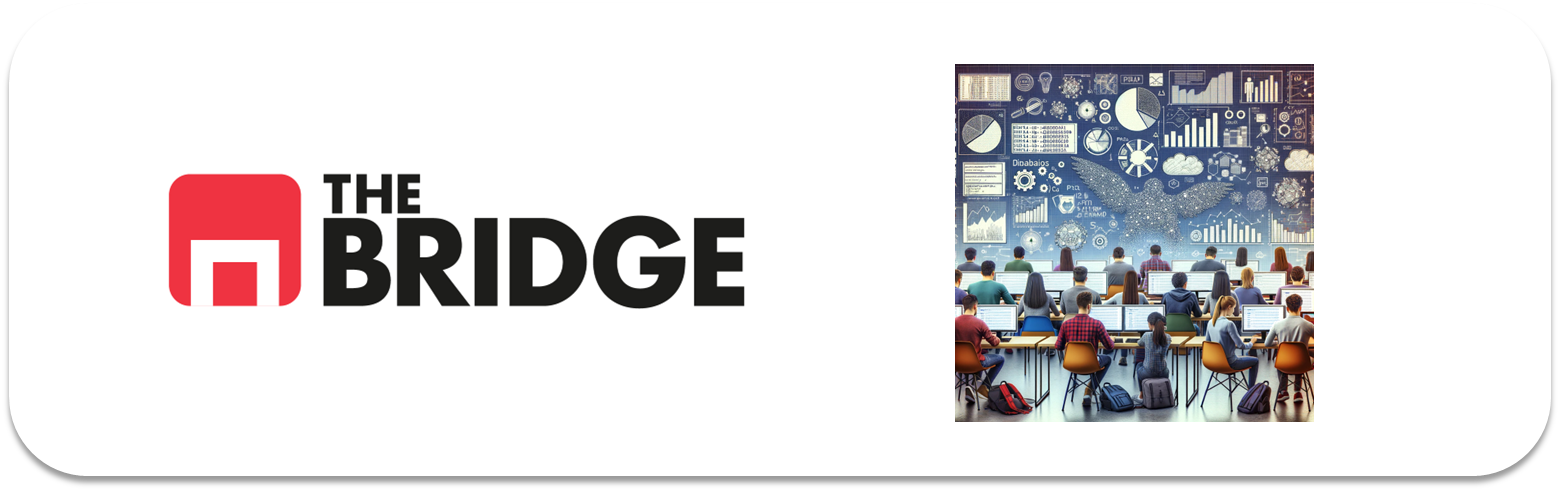

## TEAM CHALLENGE: TOOLBOX (II)

In [1]:
# Cargmaos el dataset para las pruebas
import seaborn as sns
diamonds = sns.load_dataset("diamonds")

In [2]:
diamonds.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [3]:
# Tratamiento para reg
diamonds_reg = diamonds.copy()

# Mapeo de clarity para convertirlo en numérica en función de su grado de claridad. 
clarity_mapping = {"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8}
diamonds_reg['clarity'] = diamonds_reg['clarity'].map(clarity_mapping)

# Mapero de cut para convertirlo en numérica en función de su grado de claridad en el corte.
cut_mapping = {"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5}
diamonds_reg['cut'] = diamonds_reg['cut'].map(cut_mapping)

# Mapeamos color para convertirlo a numérica en función del color, a mayor grado de color menor calidad.
color_mapping = {"D": 1, "E": 2, "F": 3, "G": 4, "H": 5, "I": 6, "J": 7}
diamonds_reg['color'] = diamonds_reg['color'].map(color_mapping)

# Definir una función que determine si un diamante es de alta calidad
def es_alta_calidad(row):
    if row['cut'] >= 3 and row['color'] <= 4 and row['clarity'] >= 4:
        return 1  # Alta calidad
    else:
        return 0  # Baja calidad
# Aplicar la función al DataFrame para crear la nueva columna binaria
diamonds_reg['alta_calidad'] = diamonds_reg.apply(es_alta_calidad, axis=1)

diamonds_reg.head(2)


,carat,cut,color,clarity,depth,table,price,x,y,z,alta_calidad
0,0.23,5,2,2,61.5,55.0,326,3.95,3.98,2.43,0
1,0.21,4,2,3,59.8,61.0,326,3.89,3.84,2.31,0


In [4]:
# Tratamiento para clas
diamonds_clas = diamonds.copy()

# Definir una función que determine si un diamante es de alta calidad
def es_alta_calidad(row):
    if row['cut'] in ['Very Good', 'Premium', 'Ideal'] and row['color'] in ['G', 'H', 'I', 'J'] and row['clarity'] in ['VS2', 'VS1', 'VVS2', 'VVS1', 'IF'] :
        return 'Alta calidad'
    else:
        return 'Baja calidad'
# Aplicar la función al DataFrame para crear la nueva columna binaria
diamonds_clas['calidad'] = diamonds_clas.apply(es_alta_calidad, axis=1)

diamonds_clas.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z,calidad
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,Baja calidad
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,Baja calidad


### Funciones

### Funcion: eval_model

Esta función debe recibir un target, unas predicciones para ese target, un argumento que determine si el problema es de regresión o clasificación y una lista de métricas:
* Si el argumento dice que el problema es de regresión, la lista de métricas debe admitir las siguientes etiquetas RMSE, MAE, MAPE, GRAPH.
* Si el argumento dice que el problema es de clasificación, la lista de métrica debe admitir, ACCURACY, PRECISION, RECALL, CLASS_REPORT, MATRIX, MATRIX_RECALL, MATRIX_PRED, PRECISION_X, RECALL_X. En el caso de las _X, X debe ser una etiqueta de alguna de las clases admitidas en el target.

Funcionamiento:
* Para cada etiqueta en la lista de métricas:
- RMSE, debe printar por pantalla y devolver el RMSE de la predicción contra el target.
- MAE, debe pintar por pantalla y devolver el MAE de la predicción contra el target. 
- MAPE, debe pintar por pantalla y devolver el MAPE de la predcción contra el target. Si el MAPE no se pudiera calcular la función debe avisar lanzando un error con un mensaje aclaratorio
- GRAPH, la función debe pintar una gráfica comparativa (scatter plot) del target con la predicción
- ACCURACY, pintará el accuracy del modelo contra target y lo retornará.
- PRECISION, pintará la precision media contra target y la retornará.
- RECALL, pintará la recall media contra target y la retornará.
- CLASS_REPORT, mostrará el classification report por pantalla.
- MATRIX, mostrará la matriz de confusión con los valores absolutos por casilla.
- MATRIX_RECALL, mostrará la matriz de confusión con los valores normalizados según el recall de cada fila (si usas ConfussionMatrixDisplay esto se consigue con normalize = "true")
- MATRIX_PRED, mostrará la matriz de confusión con los valores normalizados según las predicciones por columna (si usas ConfussionMatrixDisplay esto se consigue con normalize = "pred")
- PRECISION_X, mostrará la precisión para la clase etiquetada con el valor que sustituya a X (ej. PRECISION_0, mostrará la precisión de la clase 0)
- RECALL_X, mostrará el recall para la clase etiquetada co nel valor que sustituya a X (ej. RECALL_red, mostrará el recall de la clase etiquetada como "red")

NOTA1: Como puede que la función devuelva varias métricas, debe hacerlo en una tupla en el orden de aparición de la métrica en la lista que se le pasa como argumento. Ejemplo si la lista de entrada es ["GRAPH","RMSE","MAE"], la fución pintará la comparativa, imprimirá el RMSE y el MAE (da igual que lo haga antes de dibujar la gráfica) y devolverá una tupla con el (RMSE,MAE) por ese orden.
NOTA2: Una lista para clasificación puede contener varias PRECISION_X y RECALL_X, pej ["PRECISION_red","PRECISION_white","RECALL_red"] es una lista válida, tendrá que devolver la precisión de "red", la de "white" y el recall de "red". Si algunas de las etiquetas no existe debe arrojar ese error y detener el funcionamiento.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [6]:
def detect_problem_type(target):
    unique_values = np.unique(target)
    # Comprobación de si todos los valores son enteros o strings
    all_int_or_str = all(isinstance(x, (int, np.integer, str)) for x in unique_values)
    
    # Clasificará como 'clas' bajo las condiciones especificadas
    if len(unique_values) <= 5 or (len(unique_values) <= 15 and all_int_or_str):
        return "clas"
    else:
        return "reg"

In [7]:
def find_class_label(target_labels, class_label):
    """Busca en target_labels una coincidencia insensible a mayúsculas/minúsculas para class_label.
    Retorna la versión exacta encontrada en target_labels y un booleano indicando si hubo asimilación."""
    target_labels_lower = [label.lower() for label in target_labels]
    class_label_lower = class_label.lower()
    for original_label, lowered_label in zip(target_labels, target_labels_lower):
        if class_label_lower == lowered_label:
            return original_label, original_label.lower() != class_label_lower
    return None, False

In [8]:
def eval_reg(target, pred, metrics):
    """
    Evalúa y devuelve las métricas de rendimiento para problemas de regresión.

    Parámetros:
    - target : array-like, los verdaderos valores objetivo.
    - pred : array-like, las predicciones del modelo.
    - metrics : list, las métricas a calcular. Puede incluir 'RMSE', 'MAE', 'MAPE', 'GRAPH' o 'ALL'.

    Retorna:
    - Un diccionario con las métricas de regresión calculadas. Si se solicita una métrica no manejada,
      se incluirá en el diccionario con un valor de None y se imprimirá un mensaje al final.
    """
    results = {}
    unsupported_metrics = []

    if 'ALL' in metrics:
        metrics = ['RMSE', 'MAE', 'MAPE', 'GRAPH']
    elif isinstance(metrics, str):
        metrics = [metrics]

    for m in metrics:
        m_upper = m.upper()  # Normalizar métricas a mayúsculas

        if m_upper == "RMSE":
            rmse = np.sqrt(mean_squared_error(target, pred))
            print(f"RMSE: {rmse}")
            results["RMSE"] = rmse

        elif m_upper == "MAE":
            mae = mean_absolute_error(target, pred)
            print(f"MAE: {mae}")
            results["MAE"] = mae

        elif m_upper == "MAPE":
            try:
                mape = np.mean(np.abs((target - pred) / target)) * 100
                print(f"MAPE: {mape}%")
                results["MAPE"] = mape
            except ZeroDivisionError:
                print("MAPE cannot be calculated due to division by zero; returning MAE instead.")
                if "MAE" not in results:
                    mae = mean_absolute_error(target, pred)
                    print(f"MAE calculated instead: {mae}")
                    results["MAE"] = mae

        elif m_upper == "GRAPH":
            plt.figure(figsize=(6, 6))

            # Calcular los límites comunes para ambos ejes
            min_val = min(min(target), min(pred))
            max_val = max(max(target), max(pred))

            # Generar el scatter plot
            plt.scatter(target, pred)
            plt.xlabel('True Values')
            plt.ylabel('Predictions')
            plt.title('Comparison of True Values and Predictions')

            # Ajustar los límites de los ejes
            common_limits = [min_val, max_val]
            plt.xlim(common_limits)
            plt.ylim(common_limits)


            # Añadir una recta roja en diagonal que represente x = y
            plt.plot(common_limits, common_limits, color='red', linestyle='--')

        else:
            unsupported_metrics.append(m)

    if unsupported_metrics:
        print(f"Unsupported metrics requested: {', '.join(unsupported_metrics)}")
        for metric in unsupported_metrics:
            results[metric] = None

    return results

In [9]:
def eval_clas(target, pred, metrics, average='macro'):
    """
    Evalúa y devuelve las métricas de rendimiento para problemas de clasificación.

    Parámetros:
    - target : array-like, Verdaderos valores objetivo.
    - pred : array-like, Predicciones del modelo.
    - metrics : list, Lista de métricas a calcular. Puede incluir nombres de métricas generales y específicas de clase.
    - average: str, Método de promediado para métricas multiclase ('macro', 'micro', 'weighted', 'binary').

    Retorna:
    - Un diccionario con las métricas de clasificación calculadas.
    """
    results = {}
    unique_classes = np.unique(target)
    metrics_to_process = []

    if 'ALL' in metrics:
        metrics_to_process.extend(["ACCURACY", "PRECISION", "RECALL", "F1", "CLASS_REPORT", "MATRIX",
                                   "MATRIX_RECALL", "MATRIX_PRED"])
        metrics_to_process.extend(["PRECISION_" + str(u) for u in unique_classes] +
                                  ["RECALL_" + str(u) for u in unique_classes] +
                                  ["F1_" + str(u) for u in unique_classes])
    else:
        metrics_to_process.extend(metrics)

    for m in metrics_to_process:
        m_upper = m.upper()  # Asegura la insensibilidad a mayúsculas/minúsculas de las métricas

        if m_upper == "ACCURACY":
            accuracy = accuracy_score(target, pred)
            print(f"Accuracy: {accuracy}")
            results["ACCURACY"] = accuracy

        elif m_upper in ["PRECISION", "RECALL", "F1"]:
            if m_upper == "PRECISION":
                precision = precision_score(target, pred, average=average)
                print(f"Precision: {precision}")
                results["PRECISION"] = precision
            elif m_upper == "RECALL":
                recall = recall_score(target, pred, average=average)
                print(f"Recall: {recall}")
                results["RECALL"] = recall
            elif m_upper == "F1":
                f1 = f1_score(target, pred, average=average)
                print(f"F1 Score: {f1}")
                results["F1"] = f1

        elif m_upper == "CLASS_REPORT":
            report = classification_report(target, pred)
            print("Classification Report:\n", report)
            results["CLASS_REPORT"] = report

        elif m_upper == "MATRIX":
            cm = confusion_matrix(target, pred)
            ConfusionMatrixDisplay(cm).plot(values_format='d')
            plt.show()
            results["MATRIX"] = cm

        elif m_upper == "MATRIX_RECALL":
            cm_recall = confusion_matrix(target, pred, normalize='true')
            ConfusionMatrixDisplay(cm_recall).plot(values_format='.2f', cmap='viridis')
            plt.title("Confusion Matrix (Normalized by Recall)")
            plt.show()
            results["MATRIX_RECALL"] = cm_recall

        elif m_upper == "MATRIX_PRED":
            cm_pred = confusion_matrix(target, pred, normalize='pred')
            ConfusionMatrixDisplay(cm_pred).plot(values_format='.2f', cmap='plasma')
            plt.title("Confusion Matrix (Normalized by Predictions)")
            plt.show()
            results["MATRIX_PRED"] = cm_pred

        elif m_upper.startswith("PRECISION_") or m_upper.startswith("RECALL_") or m_upper.startswith("F1_"):
            class_label_part = m.split("_", 1)[1]
            class_label, asimilation = find_class_label(unique_classes, class_label_part)
            if class_label is None:
                print(f"Class '{class_label_part}' not found. Skipping this metric.")
                continue
            if asimilation:
                print(f"Note: Class name '{class_label_part}' was assimilated to '{class_label}' for metric calculation.")
            
            if m_upper.startswith("PRECISION_"):
                prec_class = precision_score(target, pred, labels=[class_label], average=None)
                results[f"PRECISION_{class_label}"] = prec_class[0]
            elif m_upper.startswith("RECALL_"):
                rec_class = recall_score(target, pred, labels=[class_label], average=None)
                results[f"RECALL_{class_label}"] = rec_class[0]
            elif m_upper.startswith("F1_"):
                f1_class = f1_score(target, pred, labels=[class_label], average=None)
                results[f"F1_{class_label}"] = f1_class[0]

    return results

In [10]:
def eval_model(target, pred, problem_type=None, metric='ALL', average='macro'):
    """
    Evalúa las métricas de rendimiento para modelos de regresión o clasificación,
    llamando internamente a las funciones eval_reg o eval_clas según sea necesario.

    Esta función automatiza la evaluación de múltiples métricas de rendimiento,
    facilitando la comparación entre los valores predichos y los valores reales (target).
    Además, detecta automáticamente el tipo de problema (regresión o clasificación)
    basándose en el target si no se especifica explícitamente.

    Parámetros:
    - target: array-like, valores reales/target del conjunto de datos.
    - pred: array-like, valores predichos por el modelo.
    - problem_type: str (opcional), especifica el tipo de problema ('reg' para regresión o 'clas' para clasificación).
      Si es None, el tipo de problema se detecta automáticamente.
    - metric: str o list (opcional), especifica las métricas a evaluar. Si es 'all', se evalúan todas las métricas aplicables.
      Las métricas deben estar en mayúsculas o minúsculas o cualquier combinación de estas.
    - average: str (opcional, solo para clasificación), determina el método de promediado para métricas multiclase.
      Los valores válidos son 'macro', 'micro', 'samples', 'weighted' y 'binary'.

    Retorna:
    - Un diccionario con los nombres de las métricas evaluadas como claves y los resultados calculados como valores.
      Para métricas que se imprimen directamente en pantalla (por ejemplo, gráficas o reports),
      el valor correspondiente en el diccionario puede ser None o una representación textual si es aplicable.
    """

    # Detecta automáticamente el tipo de problema (regresión o clasificación) si no se proporciona
    if problem_type is None:
        problem_type = detect_problem_type(target)
    
    # Asegura que el argumento 'metric' sea una lista para un manejo uniforme
    if isinstance(metric, str):
        metric = [metric]
        
    # Convierte todas las métricas a mayúsculas para un manejo insensible a mayúsculas y minúsculas
    metric = [m.upper() for m in metric]
    
    # Inicializa el diccionario de resultados que almacenará los valores de las métricas calculadas
    results = {}

    # Si el tipo de problema es regresión, llama a la función eval_reg y pasa los parámetros necesarios
    if problem_type == "reg":
        results = eval_reg(target, pred, metric)
    # Si el tipo de problema es clasificación, llama a la función eval_clas y pasa los parámetros necesarios
    elif problem_type == "clas":
        results = eval_clas(target, pred, metric, average)
    # Maneja el caso de que se proporcione un tipo de problema desconocido
    else:
        raise ValueError(f"Unknown problem type: {problem_type}")

    # Retorna el diccionario de resultados con las métricas calculadas
    return results

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Suponiendo que diamonds_reg es tu DataFrame y ya está cargado

# Separar las características (X) de la target (y)
X = diamonds_reg.drop('price', axis=1)
y = diamonds_reg['price']

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar un modelo de regresión lineal
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
reg_pred = reg_model.predict(X_test)

# Mostrar y_test y reg_pred para comparación (opcional: mostrar como DataFrame para una mejor visualización)
df_comparison = pd.DataFrame({'y_test': y_test, 'reg_pred': reg_pred})
print(df_comparison.head())

       y_test      reg_pred
1388      559    963.753940
50052    2201   3138.310257
41645    1238   2168.877760
42377    1304   2301.992934
17244    6901  10126.715855


RMSE: 1219.6784826054025
MAE: 800.8704887167784
MAPE: 44.797015836864844%


{'RMSE': 1219.6784826054025,
 'MAE': 800.8704887167784,
 'MAPE': 44.797015836864844}

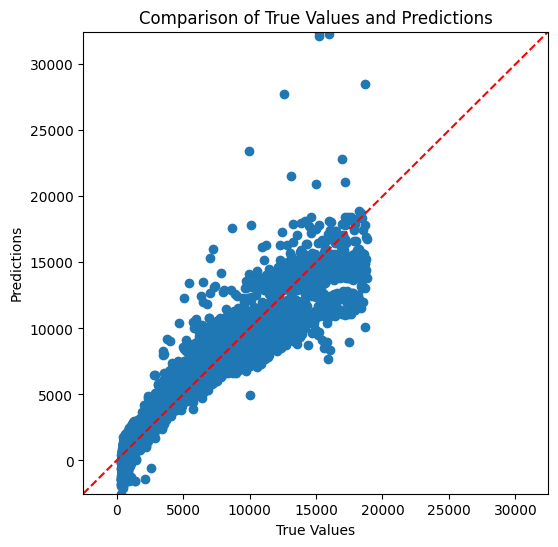

In [12]:
eval_model(y_test, reg_pred)

In [13]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split

X = diamonds_clas.drop('color', axis=1)
y = diamonds_clas['color']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear una lista de los nombres de las columnas categóricas
cat_features = [nombre_columna for nombre_columna in X.columns if X[nombre_columna].dtype == 'object' or X[nombre_columna].dtype == 'category']

# Entrenar el modelo CatBoost
model = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=10, loss_function='MultiClass', verbose=True)
model.fit(X_train, y_train, cat_features=cat_features)

# Realizar predicciones
clas_pred = model.predict(X_test)

0:	learn: 1.8674426	total: 421ms	remaining: 41.6s
1:	learn: 1.8135902	total: 568ms	remaining: 27.8s
2:	learn: 1.7614970	total: 887ms	remaining: 28.7s
3:	learn: 1.7215792	total: 1.11s	remaining: 26.8s
4:	learn: 1.6847254	total: 1.43s	remaining: 27.2s
5:	learn: 1.6547490	total: 1.73s	remaining: 27.1s
6:	learn: 1.6273027	total: 2.05s	remaining: 27.2s
7:	learn: 1.6047761	total: 2.36s	remaining: 27.2s
8:	learn: 1.5843444	total: 2.71s	remaining: 27.4s
9:	learn: 1.5646560	total: 3.07s	remaining: 27.7s
10:	learn: 1.5493432	total: 3.39s	remaining: 27.4s
11:	learn: 1.5354474	total: 3.69s	remaining: 27s
12:	learn: 1.5217695	total: 3.97s	remaining: 26.6s
13:	learn: 1.5105578	total: 4.22s	remaining: 25.9s
14:	learn: 1.4995259	total: 4.54s	remaining: 25.7s
15:	learn: 1.4889510	total: 4.82s	remaining: 25.3s
16:	learn: 1.4814845	total: 5.12s	remaining: 25s
17:	learn: 1.4685878	total: 5.41s	remaining: 24.7s
18:	learn: 1.4566100	total: 5.82s	remaining: 24.8s
19:	learn: 1.4464207	total: 6.17s	remaining: 

Accuracy: 0.4546718576195773
Precision: 0.5039209995974935
Recall: 0.41950718293826267
F1 Score: 0.4351555451051738
Classification Report:
               precision    recall  f1-score   support

           D       0.54      0.23      0.32      1362
           E       0.38      0.59      0.46      1934
           F       0.42      0.44      0.43      1898
           G       0.58      0.64      0.61      2277
           H       0.35      0.39      0.37      1597
           I       0.53      0.31      0.39      1148
           J       0.73      0.35      0.47       572

    accuracy                           0.45     10788
   macro avg       0.50      0.42      0.44     10788
weighted avg       0.48      0.45      0.45     10788



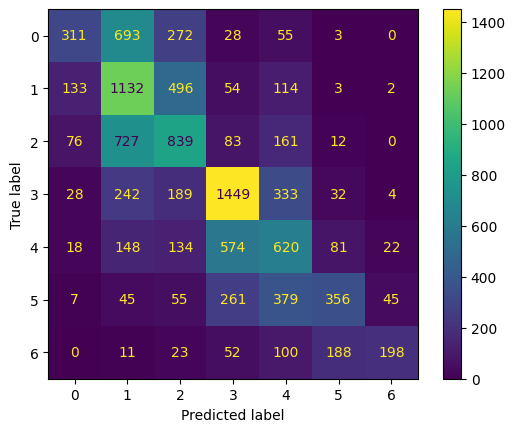

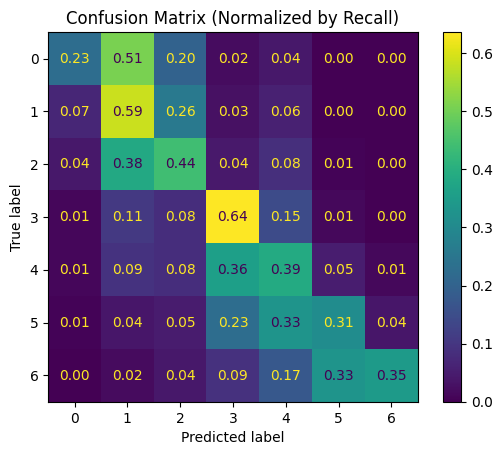

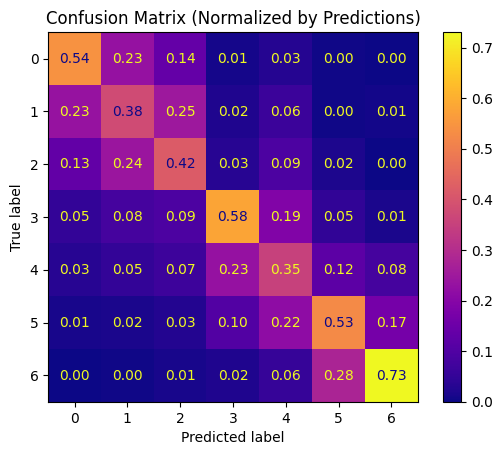

{'ACCURACY': 0.4546718576195773,
 'PRECISION': 0.5039209995974935,
 'RECALL': 0.41950718293826267,
 'F1': 0.4351555451051738,
 'CLASS_REPORT': '              precision    recall  f1-score   support\n\n           D       0.54      0.23      0.32      1362\n           E       0.38      0.59      0.46      1934\n           F       0.42      0.44      0.43      1898\n           G       0.58      0.64      0.61      2277\n           H       0.35      0.39      0.37      1597\n           I       0.53      0.31      0.39      1148\n           J       0.73      0.35      0.47       572\n\n    accuracy                           0.45     10788\n   macro avg       0.50      0.42      0.44     10788\nweighted avg       0.48      0.45      0.45     10788\n',
 'MATRIX': array([[ 311,  693,  272,   28,   55,    3,    0],
        [ 133, 1132,  496,   54,  114,    3,    2],
        [  76,  727,  839,   83,  161,   12,    0],
        [  28,  242,  189, 1449,  333,   32,    4],
        [  18,  148,  134,

In [14]:
eval_model(y_test, clas_pred, metric=['ALL'])

### Funcion: get_features_cat_num_classification


In [15]:
import pandas as pd
from scipy.stats import f_oneway, chi2_contingency

def get_features_cat_num_classification(df, target_col, pvalue_limit=0.05):
    """
    Esta función devuelve una lista de columnas categóricas o numéricas
    cuyo test Chi2 o ANOVA,respectivamente, respecto a la columna designada
    como target suepra el test de hipotesis con una significacion >= (1-pvalue_limit)

    Args:
        arg1 : Dataframe
        arg2 : Columna categórica o numérica discreta con baja cardinalidad seleccionada como target.
        arg3 : pvalue seleccionado como limite

    Retorns:
        Las columnas numericas o categoricas significativas

    Raises:
        TypeError: Si `df` no es un DataFrame de Pandas.
        ValueError: Si `target_col` no es una columna del DataFrame.
        TypeError: Si `target_col` no es una variable categórica o numérica discreta  con pvalue correcto.
    """
    # Comprobación de que df es un DataFrame(objeto,clase)
    if not isinstance(df, pd.DataFrame):
        print("Error: El primer argumento debe ser un DataFrame.")
        return None
    
    # Comprobación de que target_col es una columna en el DataFrame
    if target_col not in df.columns:
        print(f"Error: '{target_col}' no es una columna válida en el DataFrame.")
        return None
    
    # Comprobación de que pvalue es un valor válido
    if not (isinstance(pvalue_limit, float) and 0 < pvalue_limit < 1):
        print("Error: 'pvalue' debe ser un valor float en el rango (0, 1).")
        return None
    
    # Lista para almacenar las columnas significativas
    columnas_seleccionadas = []
    
    # Obtener los valores únicos de la columna target
    target_values = df[target_col].unique()
    
    # Comprobar si la variable target es categórica o numérica discreta
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].nunique() <= 10: #  menos de 10 valores únicos es categórico
            categorica = True
        else:
            categorica = False
    
    # Iterar sobre las columnas numéricas y categóricas
        if categorica:
            # Realizar el test de Chi_cuadradado para variables categóricas
            tabla_contingencia = pd.crosstab(df[col], df[target_col])
            _, p_value, _, _ = chi2_contingency(tabla_contingencia)
            #no ponemos stadisttic ni tabla de libertad ya que no es necesario para esta funcion
        else:
            # Realizar el test ANOVA para variables numéricas
            groups = [group[col] for name, group in df.groupby(target_col)]
            _,p_value = f_oneway(*groups)
        
        # Comprobar si el p-value es menor o igual al límite
        if p_value <= (1 - pvalue_limit):
            columnas_seleccionadas.append(col)

        if target_col in columnas_seleccionadas:
            columnas_seleccionadas.remove(target_col)
            
         
    
    return columnas_seleccionadas


In [16]:
result = get_features_cat_num_classification(df=diamonds_clas, target_col='cut', pvalue_limit=0.05)#categorica
print("Columnas num/cat significativas:", result)

Columnas num/cat significativas: ['carat', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'calidad']


/var/folders/dr/1qng7vzn0593pjnyktl5znnr0000gn/T/ipykernel_5242/2729950689.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col] for name, group in df.groupby(target_col)]
/var/folders/dr/1qng7vzn0593pjnyktl5znnr0000gn/T/ipykernel_5242/2729950689.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col] for name, group in df.groupby(target_col)]


In [17]:
result = get_features_cat_num_classification(df=diamonds_reg, target_col='table', pvalue_limit=0.05)#numerica
print("Columnas num/cat significativas:", result)

Columnas num/cat significativas: ['carat', 'cut', 'color', 'clarity', 'depth', 'price', 'x', 'y', 'z', 'alta_calidad']


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


### Funcion: plot_features_cat_num_classification


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, chi2_contingency

def plot_features_cat_num_classification(df, target_col, columns=[], p_value=0.05, normalized=True, max_plots=5):
    """
  Crea un scatterplot o un countplot para cada variable numérica o categórica del DataFrame con respecto a la variable objetivo, respectivamente.

  Args:
      df: Un DataFrame.
      target_col: Columna categórica o numérica discreta con baja cardinalidad seleccionada como target.

  Returns:
      1:la función crea un countplot para cada variable numérica o categórica del DataFrame con respecto al target.
      En caso que la lista de columnas este vacia, se completara con una lista de las columnas del Dataframe
      2: lista de c

  Raises:
      TypeError: Si `df` no es un DataFrame de Pandas.
      ValueError: Si `target_col` no es una columna del DataFrame.
      TypeError: Si `target_col` no es una variable categórica o numérica discreta con baja cardinalidad.
 
    """
    # Comprobación de que df es un DataFrame(objeto,clase)
    if not isinstance(df, pd.DataFrame):
        print("Error: El primer argumento debe ser un DataFrame.")
        return None
    
    # Comprobación de que target_col es una columna en el DataFrame
    if target_col not in df.columns:
        print(f"Error: '{target_col}' no es una columna válida en el DataFrame.")
        return None
    
    # Comprobación de que p_value es un valor válido
    if not (isinstance(p_value, float) and 0 < p_value < 1):
        print("Error: 'p_value' debe ser un valor float en el rango (0, 1).")
        return None
    
    # Si la lista de columnas está vacía, asignar todas las variables numéricas o categoricas del DataFrame
    if not columns:
        columns = df.select_dtypes(include=['number', "object"]).columns.tolist()
    
    # Realizar el test ANOVA o de chi-cuadrado y mantener solo las columnas que cumplen con el umbral de significancia
    # segun sea numérica o categórica
      # Lista para almacenar las columnas significativas
    col_significativas = []
    
    # Obtener los valores únicos de la columna target
    target_values = df[target_col].unique()
    
    # Comprobar si la variable target es categórica o numérica discreta
    for col in df.columns:
        if df[col].dtype == 'object' or df[col].nunique() <= 10: #  menos de 10 valores únicos es categórico
            categorica = True
        else:
            categorica = False
    
    # Iterar sobre las columnas numéricas y categóricas
        if categorica:
            # Realizar el test de Chi_cuadradado para variables categóricas
            tabla_contingencia = pd.crosstab(df[col], df[target_col])
            _, p_value, _, _ = chi2_contingency(tabla_contingencia)
            #no ponemos stadisttic ni tabla de libertad ya que no es necesario para esta funcion
        else:
            # Realizar el test ANOVA para variables numéricas
            groups = [group[col] for name, group in df.groupby(target_col)]
            _,p_value = f_oneway(*groups)
        
        # Comprobar si el p-value es menor o igual al límite
        if p_value <= (1 - p_value):
            col_significativas.append(col)   

    # Dividir las columnas en grupos de 'max_plots'  por figura
    column_groups = []
    # Itero sobre la lista 'col_significativas' con el tamaño marcado como pasos máximo deseado
    for i in range(0, len(col_significativas), max_plots):
    # Añade un subgrupo de 'max_plots' elementos a 'column_groups'
        column_groups.append(col_significativas[i:i+max_plots])
    
    # Generar plots para cada grupo de columnas
    for group in column_groups:
        if len(group) ==1: #comprobamos si solo hay 1 columna en el grupo
                fig, ax = plt.subplots(figsize=(4, 4))

        else:   
            num_plots = len(group)
            num_rows = (num_plots + 1) // 2
            num_cols = 2 if num_plots >1 else 1
            fig, axes = plt.subplots(num_rows, num_cols, figsize=(8, 4*num_rows))
        
        # Convertir axes en una lista de listas para mantener la consistencia
        axes = [axes] if num_rows == 1 else axes
        
        for i, col in enumerate(group):
            if num_plots == 1:  # Si hay solo un subplot
                ax = axes[i]
            else:
                #calculo el el numero de filas recorridas hasta el indica actual (i)
                row_idx = i // num_cols
                #calculo la posición dela figura en la fila
                col_idx = i % num_cols
                #contenedor de los subplots creados
                ax = axes[row_idx][col_idx]
               
            
            if df[col].dtype == 'object' or df[col].nunique() <= 10:
                sns.countplot(data=df, x=col, hue=target_col, ax=ax)
                ax.set_title(f'{col} vs {target_col}')
                ax.legend().remove()
            else:
                sns.scatterplot(data=df, x=col, y=target_col, hue=target_col, ax=ax, legend=ax)
                ax.set_title(f'{col} vs {target_col}')
                ax.legend().remove()
        
        plt.tight_layout()
        plt.show()
    
    return col_significativas

 

/var/folders/dr/1qng7vzn0593pjnyktl5znnr0000gn/T/ipykernel_5242/2175001610.py:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col] for name, group in df.groupby(target_col)]
/var/folders/dr/1qng7vzn0593pjnyktl5znnr0000gn/T/ipykernel_5242/2175001610.py:67: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group[col] for name, group in df.groupby(target_col)]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


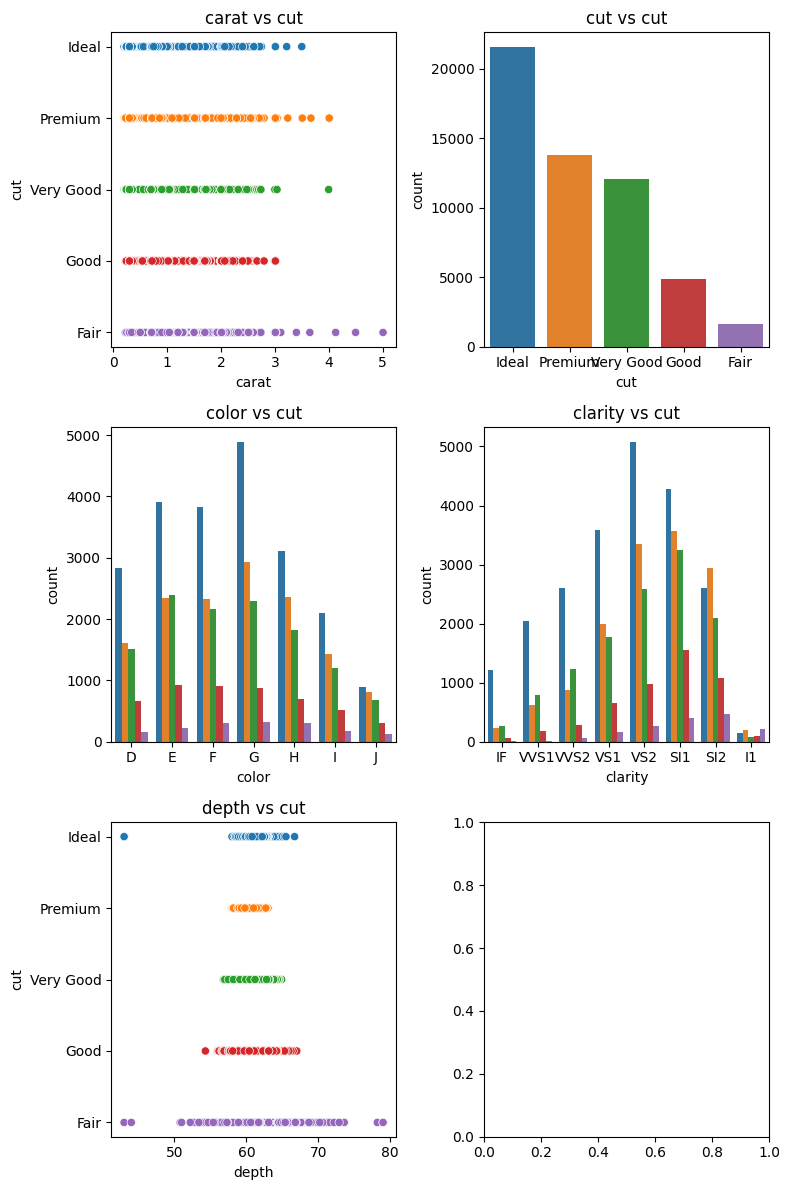

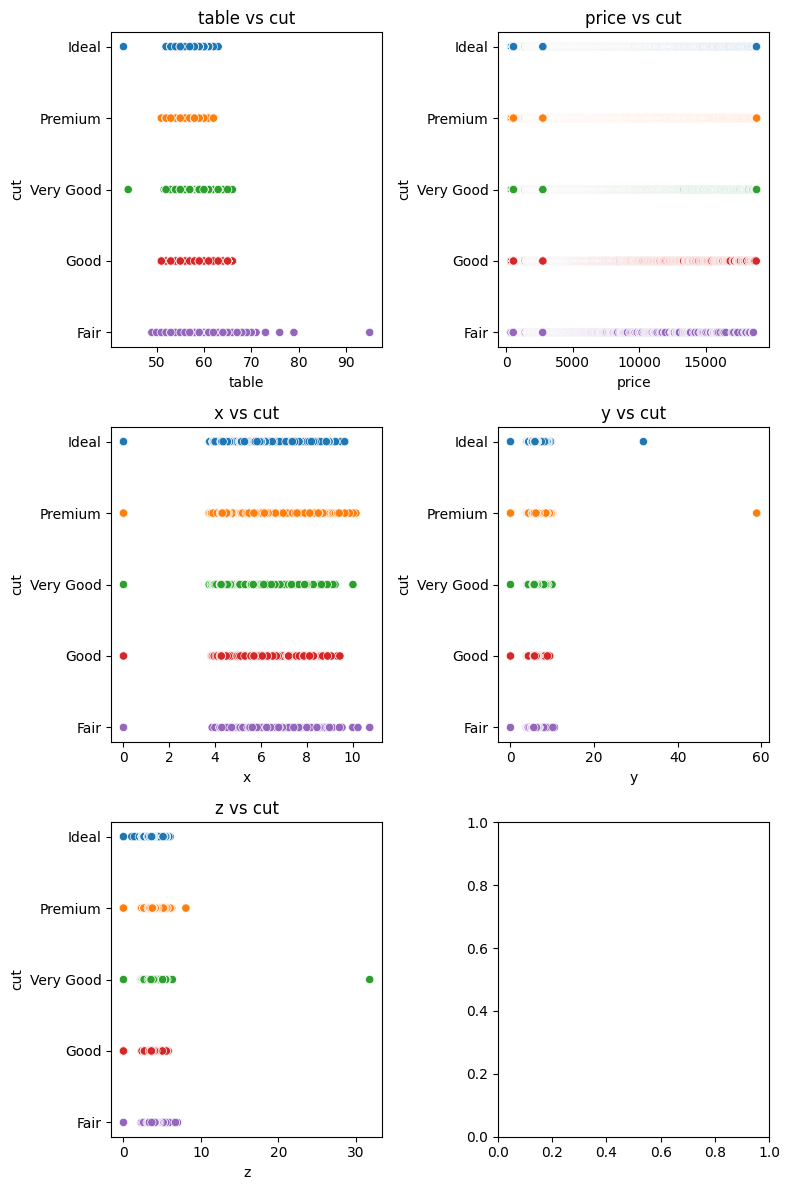

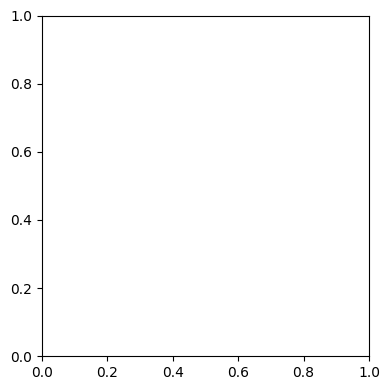

Columnas significativas: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'calidad']


In [19]:
significant_cols =  plot_features_cat_num_classification(diamonds_clas, 'cut', columns=  ['carat', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z'])#categorica
print("Columnas significativas:", significant_cols)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


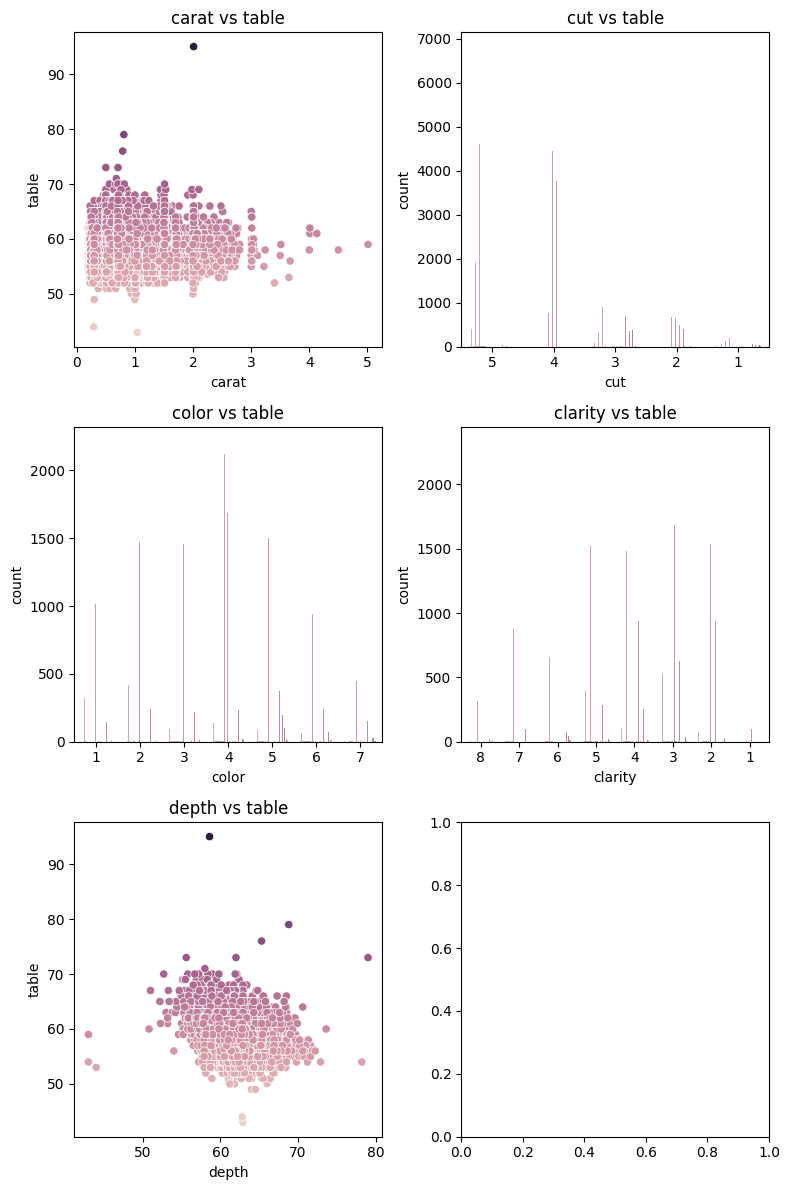

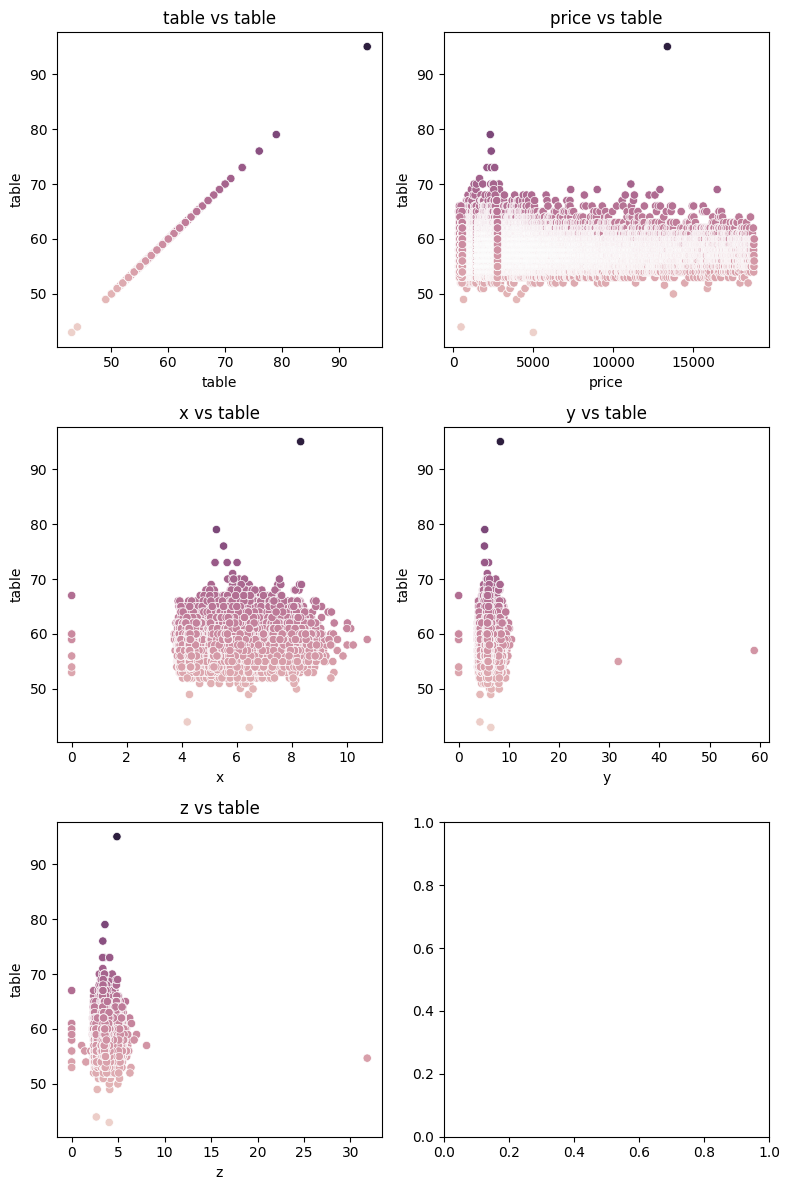

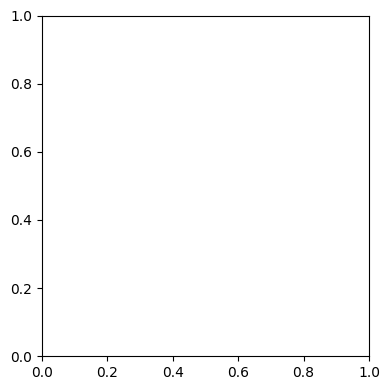

Columnas significativas: ['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', 'alta_calidad']


In [20]:
significant_cols =  plot_features_cat_num_classification(diamonds_reg, 'table', columns=  ['carat', 'cut', 'color', 'clarity', 'depth', 'price', 'x', 'y', 'z'])#numerica
print("Columnas significativas:", significant_cols)

### Funcion: super_selector 

Esta función debe recibir como argumento un dataframe de features "dataset", un argumento "target_col" (que puede hacer referencia a una feature numérica o categórica) que puede ser "", un argumento "selectores" de tipo diccionario que puede estar vacío, y un argumento "hard_voting" como una lista vacía. 

CAUSISTICA y funcionamiento:

* Si target_col no está vacío y es un columna válidad del dataframe, la función comprobará el valor de "selectores":
    * Si "selectores" es un diccionario vacío o None:
        La fución devuelve una lista con todas las columnas del dataframe que no sean el target, tengan un valor de cardinalidad diferente del 99.99% (no sean índices) y no tengan un único valor.
    * Si "selectores" no es un diccionario vacío, espera encontrar las siguientes posibles claves (y actúa en consecuencia):  
        "KBest": Tendrá como valor el número de features a seleccionar aplicando un KBest. La función debe crear una lista con las features obtenidas de emplear un SelectKBest con ANOVA.  
        "FromModel": Tendrás como valores una lista con dos elementos, el primero la instancia de un modelo de referencia y el segundo un valor entero o compatible con el argumento "threshold" de SelectFromModel de sklearn. En este caso la función debe crear un a lista con las features obtenidas de aplicar un SelectFromModel con el modelo de referencia, y utilizando "threshold" con el valor del segundo elemento si este no es un entero. En este caso, cuando sea un entero, usarás SelectFromModel con los argumentos "max_features" igual al valor del segundo elemento y "threshold" igual a -np.inf. (Esto hace que se seleccionen "max_features" features)  
        "RFE": Tendrá como valor una tupla con tres elementos. El primero será un modelo instanciado, el segundo elemento determina el número de features a seleccionar y el tercero el step a aplicar. Serán los tres argumentos del RFE de sklearn que usará la función para generar una lista de features.  
        "SFS": Tendrá como valor un tupla con 2 elementos, el modelo de referencia instanciado y el numero de featureas a alcanzar. Esta vez la función empleará un SFS para obtener las lista de features seleccionadas.

* La función debe devolver tantas listas seleccionadas como claves en el diccionario de selectores y una adicional con el resultado de aplicar un hard voting a las listas obtenidas de aplicar el diccionario "selectores" y las que contenga "hard_voting", en caso de que "hard_voting" contenga una o más listas. La función devolverá un diccionario con claves equivalentes a las de selectores pero con la lista correspondiente asignada a cada clave y una adicional "hard_voting" caso de que "hard_voting" como argumento no sea una lista vacía.

NOTA: Si hard_voting esta a [], la función sigue devolviendo el hard_voting pero sólo con las listas creadas internamente (si hay una sola también), es decir que la función siempre devuelve al menos dos listas.



In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [22]:
def super_selector(dataset, target_col="", selectores='all', hard_voting=5):
    """
    Selecciona características de un dataframe de features según diferentes métodos de selección.

    Args:
        dataset (pandas.DataFrame): El dataframe de características.
        target_col (str): El nombre de la columna objetivo.
        selectores (dict): Un diccionario con métodos de selección como claves y sus parámetros como valores.
        hard_voting (list): Una lista de características para realizar hard voting o bien un entero que especifique el número de características que se quieren. 

    Returns:
        dict: Un diccionario que contiene las características seleccionadas por cada método de selección
              y el resultado del hard voting si se especifica.
    """
    # Verificar si target_col es válido
    if target_col and target_col in dataset.columns:  # Verifica si se proporcionó un nombre de columna objetivo y si existe en el dataframe.
        target = dataset[target_col]  # Guarda la columna objetivo en 'target'.
        features = dataset.drop(columns=[target_col])  # Elimina la columna objetivo del dataframe de características y guarda el resto en 'features'.
    else:
        print(f'"{target_col} " no es una columna del dataset, por favor proporciona una columna válida')
        return None

    if selectores == {} or selectores is None:
        # Filtrar columnas que no son el target, tienen una cardinalidad diferente del 99.99%, y no tienen un único valor.
        filtered_columns  = [col for col in dataset.columns if col != target_col and len(dataset[col].unique()) != 1 
                            and ((dataset[col].nunique() / len(dataset[col])) * 100) < 99.99]
        return filtered_columns
    
    if selectores == 'all':
        selectores = {
            "KBest": 5,  # Seleccionar las 10 mejores características
            "FromModel": [
                RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2), 
                5  # Número de características a seleccionar desde el modelo
            ],
            "RFE": [
                LogisticRegression(max_iter=2000, C=1.0, solver='lbfgs'), 
                5,  # Número de características a seleccionar
                1   # Paso para la eliminación de características
            ],
            "SFS": [
                RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2), 
                5  # Número de características a seleccionar con SFS
            ] 
        }

    result = {}  # Se inicializa un diccionario para almacenar el resultado de la selección de características.

    # Seleccionar características basadas en selectores

    for selector, params in selectores.items():  # Itera sobre cada método de selección y sus parámetros.
        if selector == "KBest":  # Si el método de selección es 'KBest' (Selección de las mejores características basadas en pruebas univariadas).
            k_best = SelectKBest(score_func=f_classif, k=params)  # Inicializa el selector de las mejores características.
            k_best.fit(features, target)  # Ajusta el selector a las características y el objetivo.
            selected_features = features.columns[k_best.get_support()]  # Obtiene las características seleccionadas.
            result[selector] = selected_features.tolist()  # Almacena las características seleccionadas en el resultado.

        elif selector == "FromModel":  # Si el método de selección es 'FromModel' (Selección de características basadas en un modelo externo).
            model, threshold = params  # Obtiene el modelo y el umbral de los parámetros.
            if isinstance(threshold, int):  # Comprueba si el umbral es un número entero.
                max_features = threshold  # Si es un número entero, se establece como el número máximo de características.
                threshold = -np.inf  # El umbral se establece en infinito negativo.
            else:
                max_features = None  # Si no es un número entero, el número máximo de características no se limita.
            selector_model = SelectFromModel(model, threshold=threshold, max_features=max_features)  # Inicializa el selector basado en el modelo.
            selector_model.fit(features, target)  # Ajusta el selector a las características y el objetivo.
            selected_features = features.columns[selector_model.get_support()]  # Obtiene las características seleccionadas.
            result[selector] = selected_features.tolist()  # Almacena las características seleccionadas en el resultado.

        elif selector == "RFE":  # Si el método de selección es 'RFE' (Eliminación recursiva de características).
            model, n_features, step = params  # Obtiene el modelo, el número de características y el paso de los parámetros.
            rfe = RFE(estimator=model, n_features_to_select=n_features, step=step)  # Inicializa el selector de RFE.
            rfe.fit(features, target)  # Ajusta el selector a las características y el objetivo.
            selected_features = features.columns[rfe.support_]  # Obtiene las características seleccionadas.
            result[selector] = selected_features.tolist()  # Almacena las características seleccionadas en el resultado.

        elif selector == "SFS":  # Si el método de selección es 'SFS' (Selección secuencial hacia adelante).
            model, n_features = params  # Obtiene el modelo y el número de características de los parámetros.
            sfs = SequentialFeatureSelector(model, k_features=n_features, forward=True, floating=False, scoring='accuracy', cv=StratifiedKFold(5))  # Inicializa el selector SFS.
            sfs.fit(features, target)  # Ajusta el selector a las características y el objetivo.
            selected_features = features.columns[list(sfs.k_feature_idx_)]  # Obtiene las características seleccionadas.
            result[selector] = selected_features.tolist()  # Almacena las características seleccionadas en el resultado.

    # Realizar hard voting
    
    # Determinar si hard_voting es una lista o un entero
    is_list = isinstance(hard_voting, list)

    # Unificar el tratamiento de all_features: suma de resultados + hard_voting si es una lista
    all_features = sum((result[key] for key in result), [])
    if is_list:
        all_features.extend(hard_voting)

    if all_features:
        # Contar la frecuencia de cada característica en las listas combinadas
        voting_counts = Counter(all_features)
        # Ordenar las características por frecuencia en orden descendente
        sorted_voting = [feature for feature, _ in voting_counts.most_common()]

        # Seleccionar características basadas en hard_voting: lista = longitud de hard_voting; entero = top N características
        n_features = len(hard_voting) if is_list else hard_voting
        hard_voting_result = sorted_voting[:n_features]

        result['hard_voting'] = hard_voting_result
    else:
        print('No se han seleccionado características, revise los parámetros de entrada')

    return result  # Devuelve el resultado que contiene las características seleccionadas por cada método de selección y el resultado del hard voting.

In [23]:
# Ejemplo de uso
selectores = {
    "KBest": 5,  # Seleccionar las 10 mejores características
    "FromModel": [
        RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2), 
        5  # Número de características a seleccionar desde el modelo
    ],
    "RFE": [
        LogisticRegression(max_iter=2000, C=1.0, solver='lbfgs'), 
        5,  # Número de características a seleccionar
        1   # Paso para la eliminación de características
    ],
    "SFS": [
        RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2), 
        5  # Número de características a seleccionar con SFS
    ] 
}
result = super_selector(diamonds_reg, target_col="alta_calidad", selectores=selectores, hard_voting=["carat","cut","color","clarity","price"])
result


STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

TypeError: 'NoneType' object is not iterable